In [1]:
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv('Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4648,True
4649,False
4650,False
4651,False


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4645,False
4647,False
4649,False
4650,False


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
data = df.copy()

In [14]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [15]:
# Split features and target
X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head(), y_train.head()

(      Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
 4629          0         2017     0            2   35       1            0   
 3412          0         2014     0            3   33       1            0   
 1082          0         2012     0            3   28       1            0   
 292           0         2017     1            2   28       1            0   
 2595          0         2014     0            3   26       0            1   
 
       ExperienceInCurrentDomain  
 4629                          0  
 3412                          1  
 1082                          5  
 292                           1  
 2595                          4  ,
 4629    0
 3412    1
 1082    0
 292     0
 2595    0
 Name: LeaveOrNot, dtype: int64)

Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Set the style for plots
sns.set(style="whitegrid")

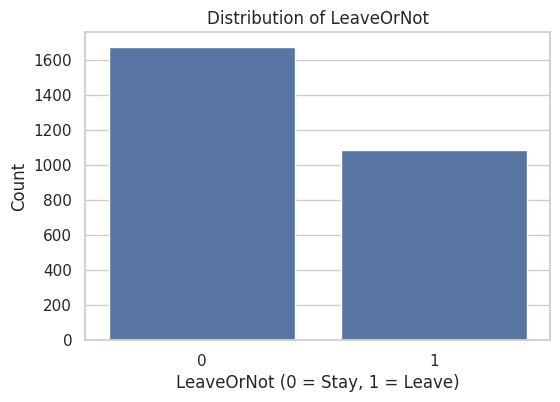

In [19]:
# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='LeaveOrNot')
plt.title('Distribution of LeaveOrNot')
plt.xlabel('LeaveOrNot (0 = Stay, 1 = Leave)')
plt.ylabel('Count')
plt.show()

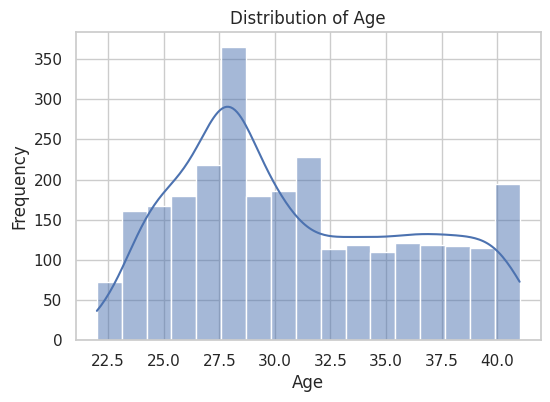

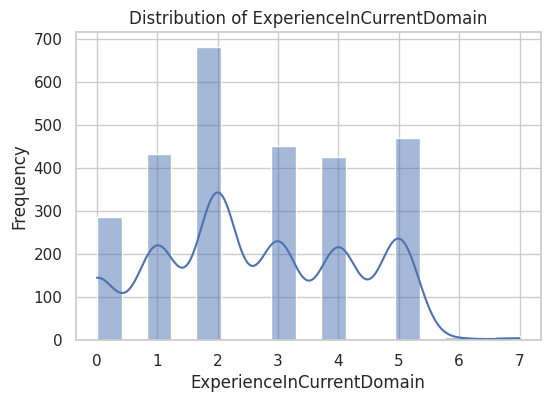

In [20]:
# Plot distributions of numerical features
num_features = ['Age', 'ExperienceInCurrentDomain']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

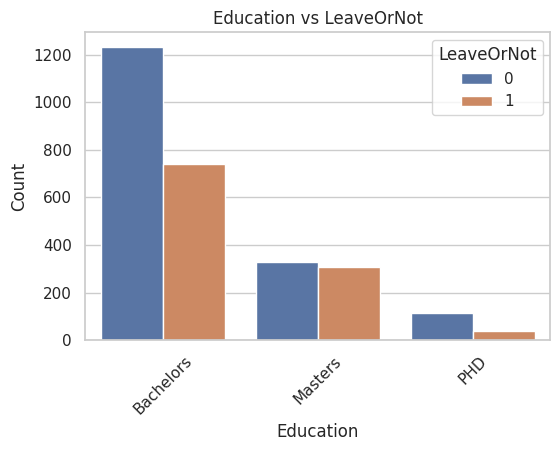

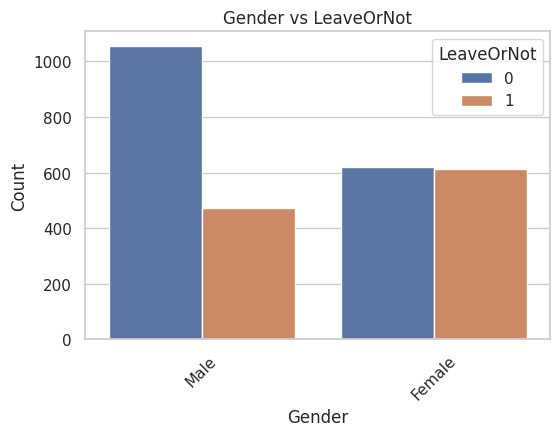

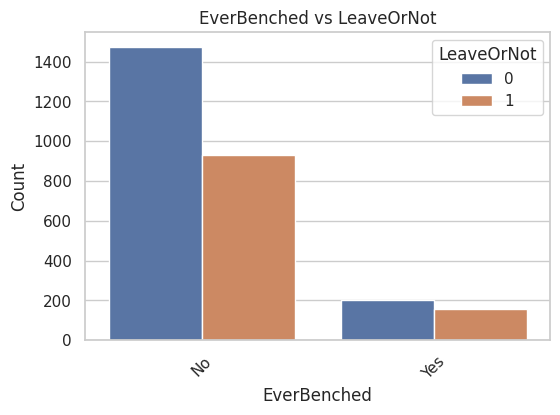

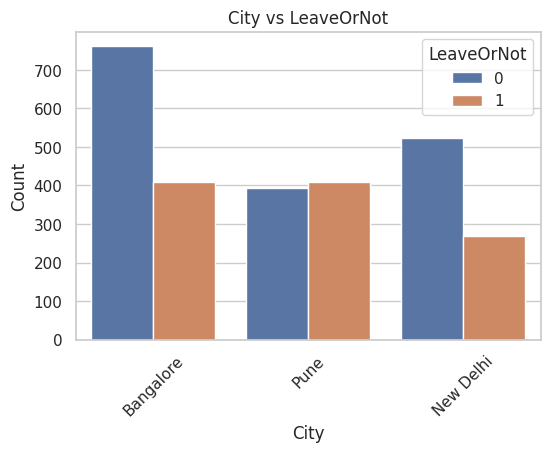

In [21]:
# Count plots for categorical features
cat_features = ['Education', 'Gender', 'EverBenched', 'City']
for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='LeaveOrNot')
    plt.title(f'{feature} vs LeaveOrNot')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='LeaveOrNot')
    plt.xticks(rotation=45)
    plt.show()